# Split data
divide the data into sleep part and awake part

In [86]:
import time
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.signal import argrelextrema

print ("Import finished!")

Import finished!


## define some functions

In [137]:
def sizeof_fmt(num, suffix='B'):
    '''output data sizes in a nice way, i.e. B, KiB, MiB, GiB, ...
    by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254,
    modified'''
    for unit in ['', 'Ki', 'Mi', 'Gi', 'Ti', 'Pi', 'Ei', 'Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

def readMiceData(batch, name):
    if debug:
        print('{}/batch{}/{}.Activity.txt'.format(path, batch, name))
        print('{}/batch{}/{}.Temperature.txt'.format(path, batch, name))
    a = np.genfromtxt('{}/batch{}/{}.Activity.txt'.format(path, batch, name))
    b = np.genfromtxt('{}/batch{}/{}.Temperature.txt'.format(path, batch, name))

    if a[0,0] != b[0,0]:
        start = max(a[0,0], b[0,0])
    else:
        start = a[0,0]
    if a[-1,0] != b[-1,0]:
        end = min(a[-1,0], b[-1,0])
    else:
        end = a[-1,0]

    a = a[(a[:,0]<=end)]
    a = a[(a[:,0]>=start)]
    b = b[(b[:,0]<=end)]
    b = b[(b[:,0]>=start)]
    
    return a, b

def getMidpeek(data):
    density = np.histogram(data, bins=100 ,density=True)
    
    weight = density[0]
    tempx = density[1][0:-1]

    temp_offset = np.mean(tempx)
    tempx = tempx - temp_offset
    
    # fit with a smooth line
    z = np.polyfit (tempx, weight, 20)
    fitfunc = np.poly1d(z)
    
    x = np.arange(tempx[0],tempx[-1],(tempx[-1]-tempx[0])/100)
    y = fitfunc(x)
    
    plt.plot(x,y)
    plt.plot(tempx,weight)
    plt.show()
    plt.savefig("fit_vs_ori.pdf")
    
    maxid = argrelextrema(y, np.greater)
    maxes = y[maxid]
    a = np.sort(maxes, kind="quicksort")

    maxima1 = a[-1]
    maxima2 = a[-2]

    maxid1 = np.where(y == maxima1)[0]
    maxid2 = np.where(y == maxima2)[0]
    # maxid1, maxid2

    maxtemp1 = x[maxid1]
    maxtemp2 = x[maxid2]

    midpeek = (maxtemp1[0] + maxtemp2[0]) / 2.0 + temp_offset
    
    return midpeek
def index_by_value(temp, midpeek):
    sleepidx = np.nonzero(temp < midpeek)[0]
    awakeidx = np.nonzero(temp >= midpeek)[0]
    return awakeidx, sleepidx

def idx_to_stage(idx):
    stages = []
    last = idx[0]
    i=1
    while i < len(idx):
        current = idx[i]
        if (current - idx[i-1] > 1):
            stages.append([last, idx[i-1]])
            last = current
        i+=1 
    return stages


## Read the meta data

In [88]:
debug = 0
# Readin the meta data
path = '.'
metaData = pd.read_csv("./mice", index_col=0)

In [29]:
database = {}
for mouse in metaData.index: 
    print (mouse)
    batch = metaData.loc[mouse, 'batch']
    act, temp = readMiceData(batch, mouse)
    database[mouse] = [act, temp]

12Otx2
./batch3/12Otx2.Activity.txt
./batch3/12Otx2.Temperature.txt
56Otx2
./batch3/56Otx2.Activity.txt
./batch3/56Otx2.Temperature.txt
73Otx2
./batch3/73Otx2.Activity.txt
./batch3/73Otx2.Temperature.txt
84Otx2
./batch3/84Otx2.Activity.txt
./batch3/84Otx2.Temperature.txt
82WT
./batch3/82WT.Activity.txt
./batch3/82WT.Temperature.txt
83WT
./batch3/83WT.Activity.txt
./batch3/83WT.Temperature.txt
51M
./batch5/51M.Activity.txt
./batch5/51M.Temperature.txt
52M
./batch5/52M.Activity.txt
./batch5/52M.Temperature.txt
54M
./batch5/54M.Activity.txt
./batch5/54M.Temperature.txt
56M
./batch5/56M.Activity.txt
./batch5/56M.Temperature.txt
58M
./batch5/58M.Activity.txt
./batch5/58M.Temperature.txt
53
./batch5/53.Activity.txt
./batch5/53.Temperature.txt
55
./batch5/55.Activity.txt
./batch5/55.Temperature.txt
57
./batch5/57.Activity.txt
./batch5/57.Temperature.txt
68M
./batch6/68M.Activity.txt
./batch6/68M.Temperature.txt
62M
./batch6/62M.Activity.txt
./batch6/62M.Temperature.txt
64M
./batch6/64M.Activi

In [25]:
metaData.loc['12Otx2', 'batch']

3

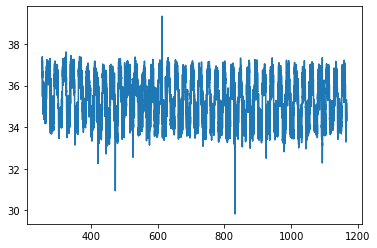

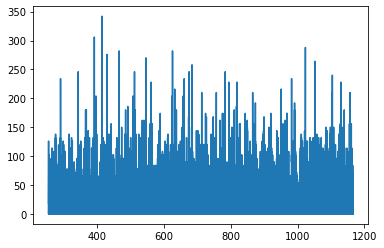

In [90]:
path = '.'
batch = 3
mouse = '12Otx2'
act, temp = readMiceData(batch, mouse)

# data overview
plt.plot(temp[:,0], temp[:,1])
plt.show()
plt.plot(act[:,0], act[:,1])
plt.show()

In [91]:
winSize = 6
winNum = len(temp) // 6
tmp = temp[:,1].reshape(winNum,winSize)

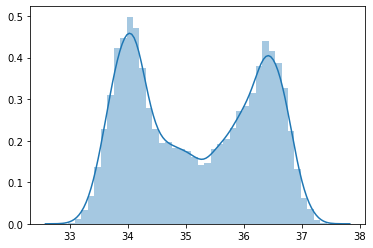

In [92]:
tempave = np.mean(tmp, axis=1)
sb.distplot(tempave)
plt.show()

In [93]:
density = np.histogram(tempave, bins=100 ,density=True)
print (density)

(array([2.46245737e-03, 2.46245737e-03, 4.92491475e-03, 9.84982950e-03,
       1.47747442e-02, 2.21621164e-02, 3.52952224e-02, 5.13011953e-02,
       5.29428336e-02, 8.49547794e-02, 1.17787544e-01, 1.43643347e-01,
       1.74424064e-01, 2.17106659e-01, 2.58968434e-01, 2.89749151e-01,
       3.16425773e-01, 3.50079357e-01, 4.37086184e-01, 4.42011099e-01,
       4.40369461e-01, 4.45704785e-01, 4.62121167e-01, 5.09728677e-01,
       5.07676629e-01, 4.80589598e-01, 4.66635673e-01, 4.39959051e-01,
       3.88657856e-01, 3.43102394e-01, 3.00830209e-01, 2.68818263e-01,
       2.43783280e-01, 2.44604099e-01, 2.04383962e-01, 2.04383962e-01,
       1.85915532e-01, 1.90430037e-01, 2.03563143e-01, 1.94123723e-01,
       1.79348979e-01, 1.95354952e-01, 1.76886521e-01, 1.72782426e-01,
       1.81401027e-01, 1.86325941e-01, 1.63753415e-01, 1.73603245e-01,
       1.64163825e-01, 1.54724405e-01, 1.52672357e-01, 1.34614336e-01,
       1.41591299e-01, 1.48978671e-01, 1.46926623e-01, 1.73192835e-01,
     

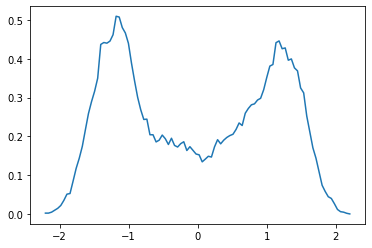

In [94]:
weight = density[0]
tempx = density[1][0:-1]

temp_offset = np.mean(tempx)
tempx = tempx - temp_offset

plt.plot(tempx, weight)

In [95]:
z = np.polyfit (tempx, weight, 20)
fitfunc = np.poly1d(z)

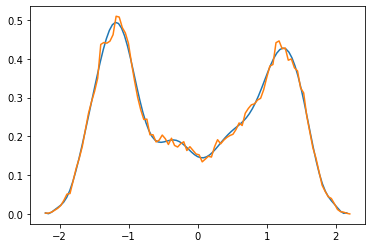

In [123]:
x = np.arange(tempx[0],tempx[-1],(tempx[-1]-tempx[0])/100)
y = fitfunc(x)
plt.plot(x,y, label='fited')
plt.plot(tempx,weight, label='orignal')
plt.show()

In [122]:
maxid = argrelextrema(y, np.greater)
maxes = y[maxid]
a = np.sort(maxes, kind="quicksort")

maxima1 = a[-1]
maxima2 = a[-2]

maxid1 = np.where(y == maxima1)[0]
maxid2 = np.where(y == maxima2)[0]
# maxid1, maxid2

maxtemp1 = x[maxid1]
maxtemp2 = x[maxid2]

midpeek = (maxtemp1[0] + maxtemp2[0]) / 2.0 + temp_offset

(array([23]), array([78]))

35.20069402499999

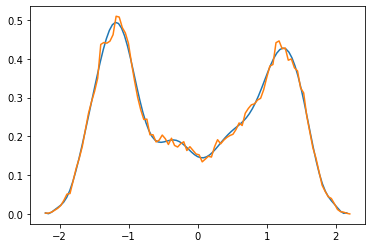

In [127]:
getMidpeek(tempave)

In [104]:
tmp = temp[:,1]
np.nonzero(tmp >= midpeek)

(array([     0,      1,      2, ..., 328162, 328165, 328166]),)

In [105]:
tmp = temp[:,1]

sleeptemp = temp[tmp < midpeek]
awaketemp = temp[tmp >= midpeek]

sleepidx = np.nonzero(tmp < midpeek)[0]
awakeidx = np.nonzero(tmp >= midpeek)[0]

In [117]:
sleepstages = idx_to_stage(sleepidx)
awakestages = idx_to_stage(awakeidx)

In [119]:
awakestages[0], sleepstages[0]

([0, 651], [652, 1281])

In [75]:
print("total: ", len(temp[:,1]))
print("awake: ", len(awaketemp))
print("sleep: ", len(sleeptemp))

total:  328320
awake:  160171
sleep:  168149


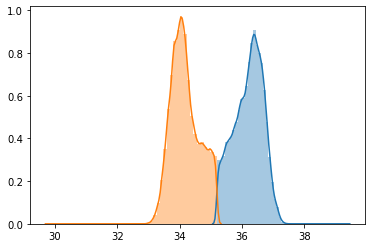

In [133]:
awaketemp = temp[awakeidx]
sleeptemp = temp[sleepidx]

sb.distplot(awaketemp[:,1])
sb.distplot(sleeptemp[:,1])

In [134]:
midpeek

35.20069402499999

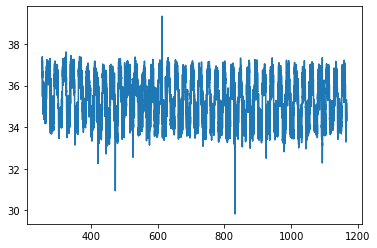

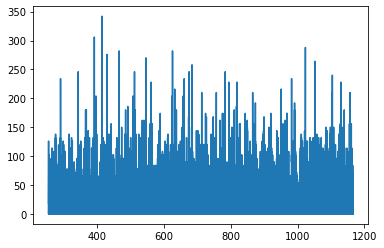

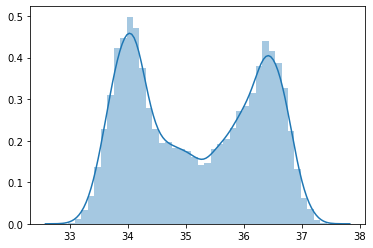

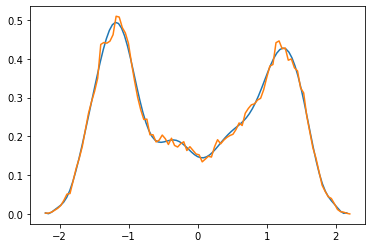

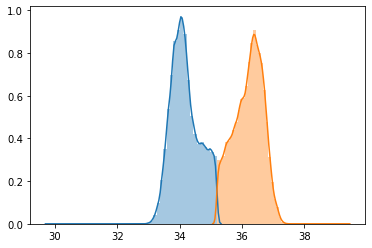

In [139]:
path = '.'
batch = 3
mouse = '12Otx2'
act, temp = readMiceData(batch, mouse)

# data overview
plt.plot(temp[:,0], temp[:,1])
plt.show()
plt.plot(act[:,0], act[:,1])
plt.show()

winSize = 6
winNum = len(temp) // 6
tmp = temp[:,1].reshape(winNum,winSize)

tempave = np.mean(tmp, axis=1)
sb.distplot(tempave)
plt.show()

midpeek = getMidpeek(tempave)

awakeidx, sleepidx = index_by_value(temp[:,1], midpeek)

sleeptemp = temp[sleepidx]
awaketemp = temp[awakeidx]
sb.distplot(sleeptemp[:,1])
sb.distplot(awaketemp[:,1])
plt.show()

awakestages = idx_to_stage(awakeidx)
sleepstages = idx_to_stage(sleepidx)